# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from gensim.corpora import Dictionary
from gensim.models import LdaModel, TfidfModel, LsiModel, CoherenceModel

import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import umap
from sklearn.manifold import TSNE

/home/omar-oc/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-03-23 22:32:23.904329: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-23 22:32:24.024752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/omar-oc/anaconda3/envs/env_OC_P5/lib/python3.10/site-packages/umap/__init__.py:36: DeprecationW

In [2]:
df = pd.read_csv("final_dataset.csv")[["text", "tags"]]

In [3]:
df.head()

,text,tags
0,protractor break loopi need help loop beak c...,['javascript']
1,electron proxy url create small server out...,['javascript']
2,angular materializecss modal dialog open...,['javascript']
3,throw new typeerror app use require middl...,['javascript']
4,display waiter resolve datum angular pr...,['javascript']


In [4]:
l_sentences = []
for description in df.text:
    l_sentences.append(description.split())

dictionary = Dictionary(l_sentences)
corpus = [dictionary.doc2bow(sentence) for sentence in l_sentences]

In [13]:
df.iloc[1].text

'electron proxy url create small server     output request url   const http    require   http     http createserver onrequ   listen         function onrequ clientrequest   clientresponse         console log clientrequest url       use electron apis set proxy   proxy url server     run server localhost       use    proxy server http    localhost       redirect traffic proxy server   allow change snippet html render electron   access http    ionicabizau net request url server side http    ionicabizau net   come override request url way   electron background   first think append like    http    localhost       http    ionicabizau net   actually   arrive server like   http    ionicabizau net   notice first slash    magic electron change url request object  '

# LDA

In [14]:
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=5)
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [21]:
# Afficher tous les topics générés avec leurs mots importants
print("Topics générés par le modèle :")
topics = lda_model.print_topics(num_topics=-1, num_words=10)  # -1 pour afficher tous les topics
for topic in topics:
    print(topic)

Topics générés par le modèle :
(0, '0.017*"file" + 0.015*"python" + 0.015*"error" + 0.013*"lib" + 0.012*"package" + 0.011*"module" + 0.011*"py" + 0.011*"line" + 0.010*"run" + 0.010*"app"')
(1, '0.059*"string" + 0.055*"public" + 0.039*"new" + 0.025*"return" + 0.021*"int" + 0.019*"get" + 0.019*"void" + 0.016*"private" + 0.016*"null" + 0.015*"class"')
(2, '0.074*"android" + 0.026*"layout" + 0.018*"view" + 0.015*"width" + 0.014*"height" + 0.013*"app" + 0.011*"com" + 0.011*"color" + 0.010*"content" + 0.008*"px"')
(3, '0.039*"self" + 0.025*"let" + 0.021*"image" + 0.018*"view" + 0.014*"func" + 0.012*"cell" + 0.010*"nil" + 0.010*"var" + 0.010*"text" + 0.010*"button"')
(4, '0.021*"name" + 0.020*"class" + 0.016*"value" + 0.014*"div" + 0.014*"table" + 0.013*"datum" + 0.013*"model" + 0.012*"type" + 0.011*"user" + 0.011*"get"')
(5, '0.075*"java" + 0.047*"org" + 0.019*"com" + 0.013*"springframework" + 0.012*"apache" + 0.011*"version" + 0.011*"jar" + 0.011*"dependency" + 0.011*"internal" + 0.010*"spr

In [22]:
# Représentation du document (par exemple, df.iloc[1]['text']) en BoW
document = df.iloc[1].text.split()  # Découpage en tokens, si ce n'est pas déjà fait
bow = dictionary.doc2bow(document)

# Obtenir la distribution des topics pour ce document
topic_probs = lda_model.get_document_topics(bow)

print("Distribution des topics pour le document :")
for topic_id, prob in topic_probs:
    # Affiche les topics associés avec leur probabilité
    print(f"Topic {topic_id} - Probabilité : {prob:.4f}")

    # Récupérer les 3 mots-clés les plus fréquents pour ce topic
    topic_terms = lda_model.show_topic(topic_id, topn=3)
    keywords = [word for word, weight in topic_terms]
    print(f"  Mots-clés principaux : {', '.join(keywords)}\n")

Distribution des topics pour le document :
Topic 0 - Probabilité : 0.4428
  Mots-clés principaux : file, python, error

Topic 1 - Probabilité : 0.0370
  Mots-clés principaux : string, public, new

Topic 9 - Probabilité : 0.5123
  Mots-clés principaux : use, file, app



In [ ]:
CoherenceModel(model=lda_model, texts=l_sentences, dictionary=dictionary, coherence='c_v').get_coherence()

0.5406285031583716

# LSI

In [11]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
lsi_model = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=10)

/home/omar-oc/anaconda3/envs/env_OC_P5/lib/python3.10/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(
/home/omar-oc/anaconda3/envs/env_OC_P5/lib/python3.10/site-packages/gensim/models/lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


In [12]:
topics = lsi_model.print_topics(num_topics=10, num_words=5)
for topic in topics:
    print(topic)

(0, '0.253*"android" + 0.134*"file" + 0.119*"user" + 0.112*"app" + 0.107*"java"')
(1, '-0.784*"android" + -0.337*"layout" + -0.110*"parent" + -0.099*"dp" + -0.095*"height"')
(2, '-0.416*"java" + -0.394*"org" + -0.246*"springframework" + -0.186*"artifactid" + -0.180*"groupid"')
(3, '-0.339*"df" + -0.257*"column" + -0.231*"dataframe" + -0.215*"b" + -0.161*"panda"')
(4, '-0.295*"div" + 0.289*"python" + 0.232*"file" + 0.186*"py" + -0.160*"class"')
(5, '0.389*"image" + 0.235*"self" + -0.169*"user" + -0.159*"df" + -0.149*"php"')
(6, '-0.377*"div" + 0.197*"public" + -0.172*"js" + 0.167*"string" + -0.159*"form"')
(7, '0.344*"image" + -0.273*"self" + -0.262*"python" + 0.250*"df" + -0.245*"py"')
(8, '-0.430*"array" + -0.242*"image" + -0.223*"php" + 0.211*"df" + 0.206*"self"')
(9, '0.274*"php" + 0.213*"table" + -0.201*"js" + 0.190*"image" + 0.181*"database"')


In [13]:
CoherenceModel(model=lsi_model, texts=l_sentences, dictionary=dictionary, coherence='c_v').get_coherence()

0.43079652667109497

# LDA : visualization

In [23]:
documents_with_labels = pd.DataFrame({
    'Document': l_sentences,
    'Label': df.tags
})

## PCA

Building the topic matrix for the dataset 

In [15]:
topic_dist = [lda_model.get_document_topics(doc) for doc in corpus]


num_topics = lda_model.num_topics
topic_matrix = np.zeros((len(corpus), num_topics))

for i, doc in enumerate(topic_dist):
    for topic, prob in doc:
        topic_matrix[i, topic] = prob

print(topic_matrix[:5])

[[0.         0.         0.         0.62276947 0.15339071 0.
  0.02510569 0.         0.17331405 0.01846148]
 [0.36876383 0.         0.         0.53986079 0.         0.
  0.06073319 0.         0.         0.02377428]
 [0.         0.02623972 0.14861616 0.2445901  0.57683283 0.
  0.         0.         0.         0.        ]
 [0.03024524 0.41500041 0.         0.21185832 0.29678354 0.04394895
  0.         0.         0.         0.        ]
 [0.         0.20966831 0.         0.50944567 0.20163046 0.
  0.         0.06257095 0.         0.        ]]


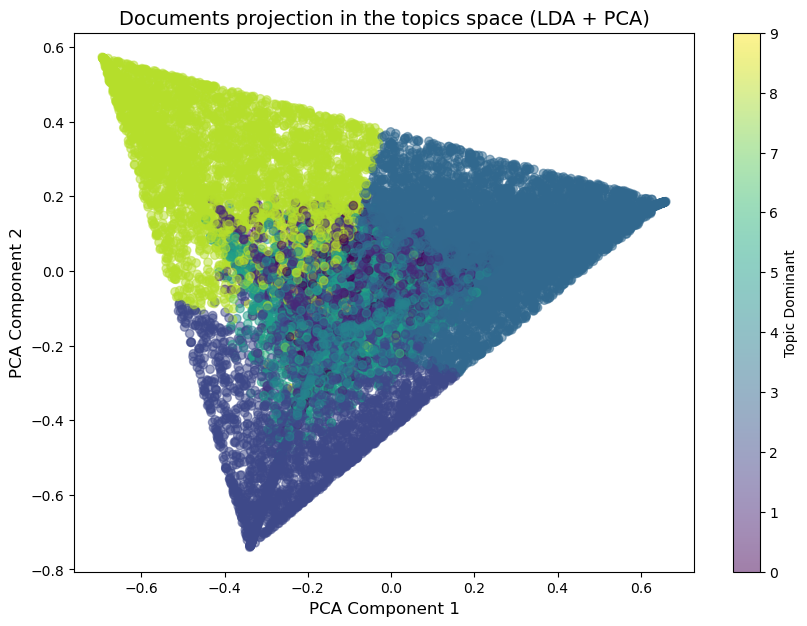

In [ ]:
dominant_topics = np.argmax(topic_matrix, axis=1)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(topic_matrix)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=dominant_topics, alpha=0.5, cmap='viridis')
plt.title("2D-documents projection in the topics space (LDA + PCA)", fontsize=14)
plt.xlabel("PCA Component 1", fontsize=12)
plt.ylabel("PCA Component 2", fontsize=12)

plt.colorbar(scatter, label='Dominant Topic ')

plt.show()

## UMAP and t-SNE

In [30]:
topic_vectors = []
for doc in corpus:
    topics = lda_model.get_document_topics(doc, minimum_probability=0)
    topic_vectors.append([prob for _, prob in topics])

topic_vectors = np.array(topic_vectors)

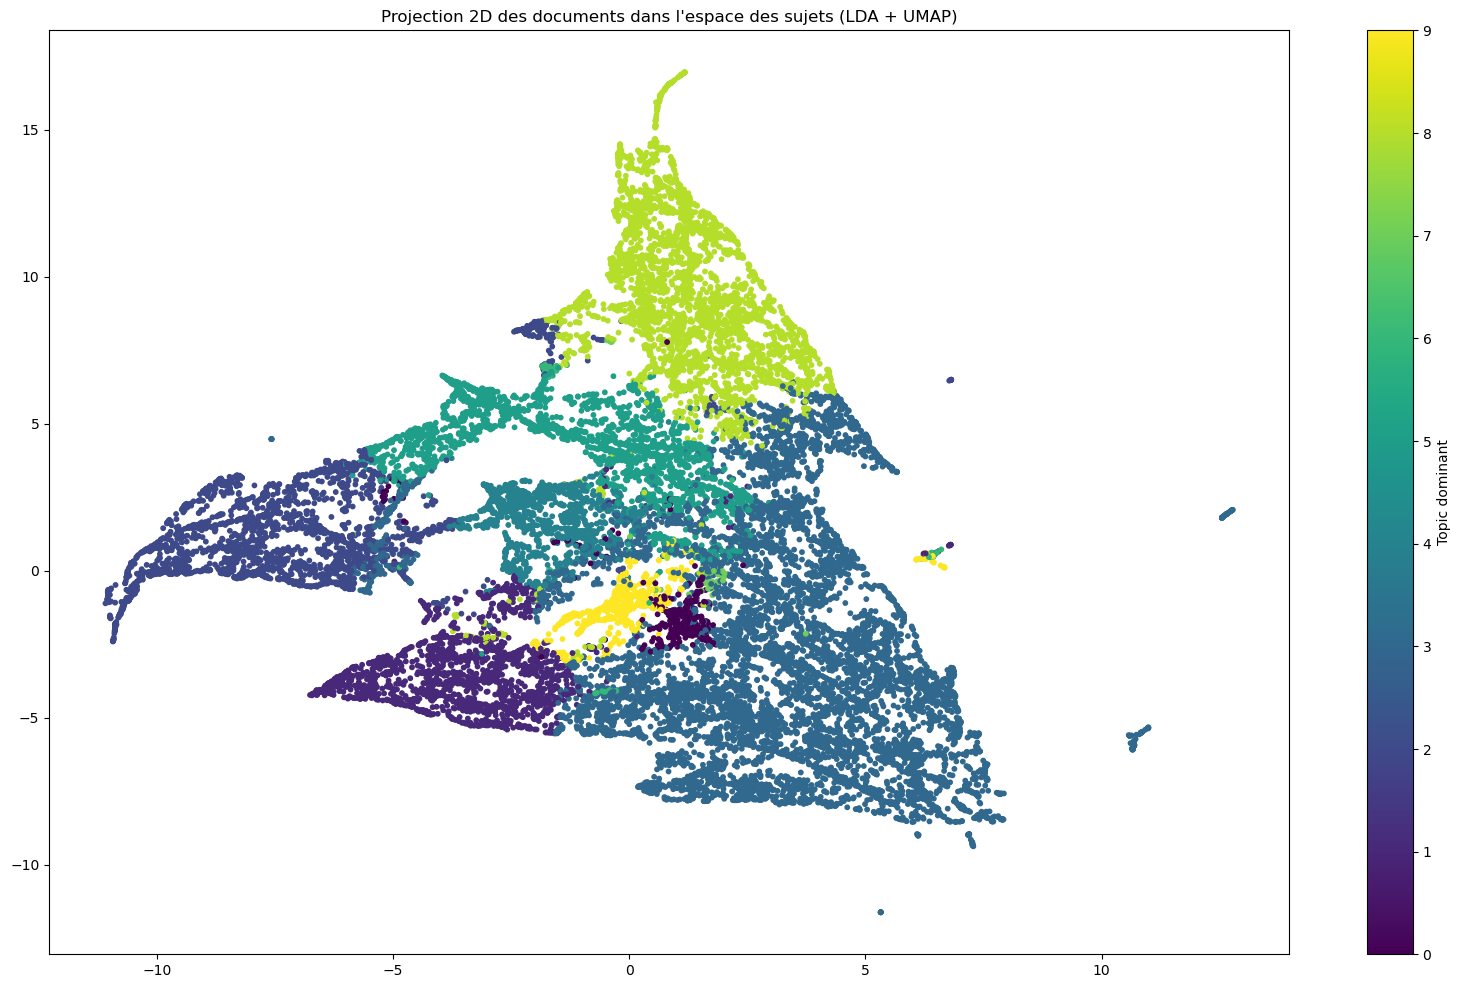

In [ ]:
reducer_UMAP = umap.UMAP(n_neighbors=10, min_dist=0.1)

embedding = reducer_UMAP.fit_transform(topic_vectors)

plt.figure(figsize=(20, 12))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.argmax(topic_vectors, axis=1), cmap='viridis', s=10)
plt.colorbar(label="Dominant Topic")
plt.title("2D-documents projection in the topics space (LDA + UMAP)")
plt.show()

/home/omar-oc/anaconda3/envs/env_OC_P5/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


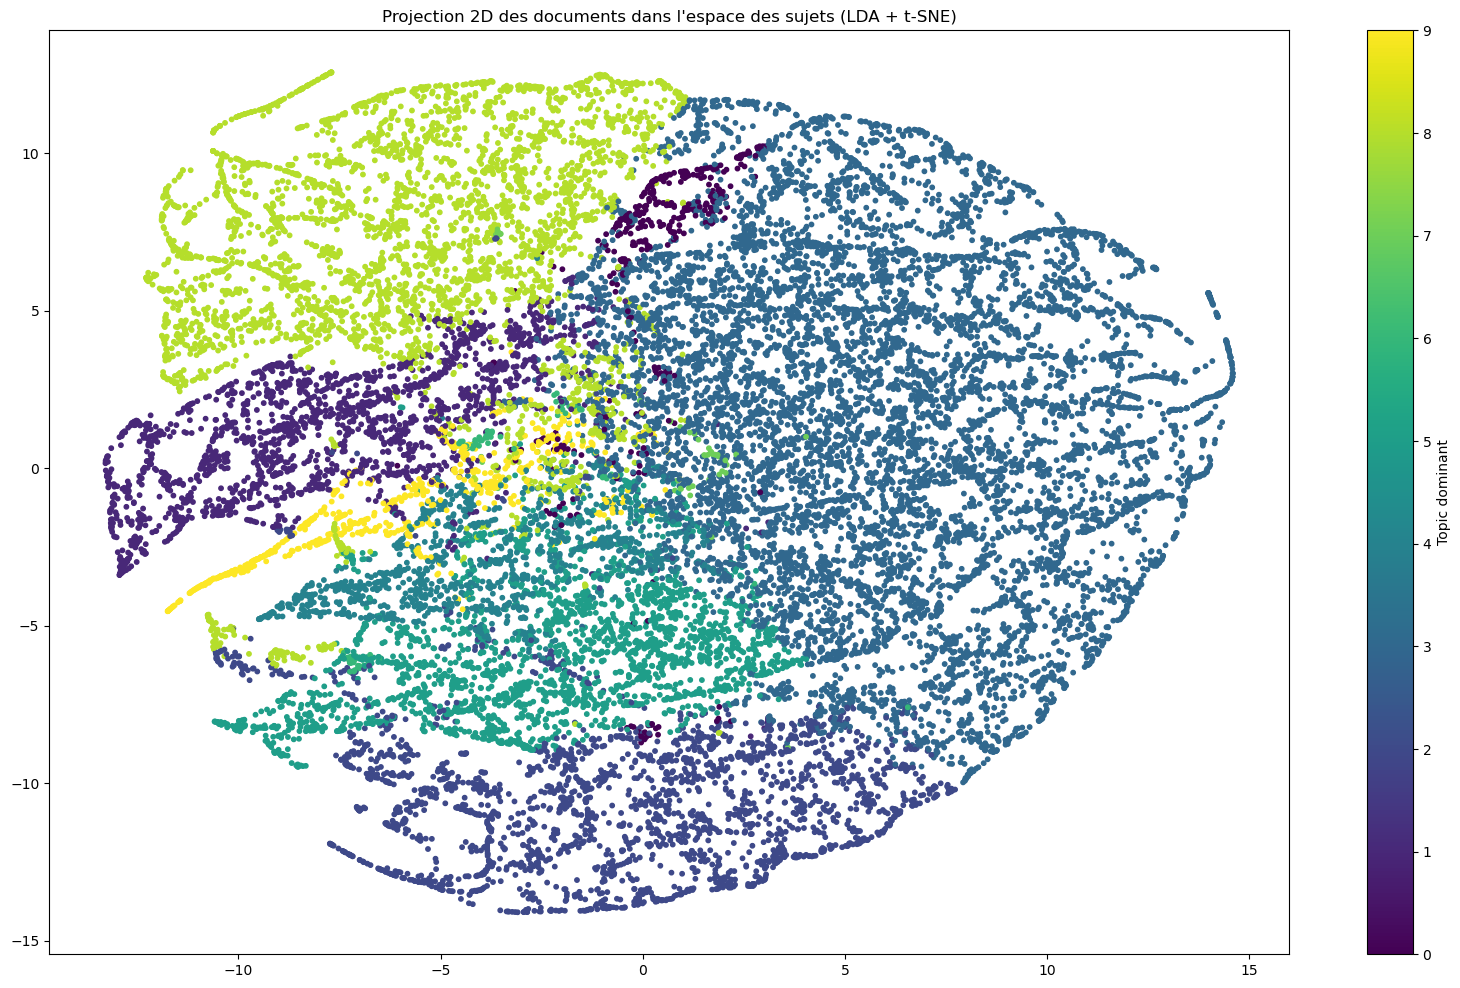

In [28]:
reducer_TSNE = TSNE(n_components=2, perplexity=10, n_iter=300)

embedding = reducer_TSNE.fit_transform(topic_vectors)

plt.figure(figsize=(20, 12))
plt.scatter(embedding[:, 0], embedding[:, 1], c=np.argmax(topic_vectors, axis=1), cmap='viridis', s=10)
plt.colorbar(label="Dominant Topic")
plt.title("2D-documents projection in the topics space (LDA + t-SNE)")
plt.show()